Authors: Aniruddha Shinde, Samarth Singhania

**(Question 2)**: *Can we identify Airbnb listings that will be able to earn higher than the average market earnings in a month? What features affect the revenue the most?*  
 **Date**: 7/10/2021

**Introduction**

Our dataset contains Airbnb listings data from Ontario. Airbnb is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. This home-sharing platform allow users (‘hosts’) to put their properties (‘listings’) up for rent at a desired price and allow others (guests) to request stays. Airbnb does not own any of the listed properties; instead, it profits by receiving commission and fees from each booking which makes it a very asset light business model, perfect for the current environment with minimal risk. So in sense this is a mixture of part sharing economy, part entrepreneurship for host listing their properties for rent and partly an opportunity to meet with new people by booking private/shared rooms or renting out houses.  Lastly, this is a great alternative for individuals who are tired of living in expensive hotels which zero to none facilities such as kitchen, spacious rooms, washer, dryer, etc.

When hotels want to increase the value of their room, they offer room amenities that matter most to travelers. In fact, Per PwC’s Consumer Intelligence Series Report on hotel brand loyalty, “Both business and leisure travelers say room quality is the #1 reason for choosing a hotel.” Hotels have learned the art of maximizing the values of their rooms, however is there a way for AirBnB hosts to do that too?

Our goal is to help hosts maximize the value of their AirBnb rental. We will do that by building a model that identifies those Airbnb rental which will be able to earn higher than the average market earnings in a month, and seeing which features contribute most to those earnings.

Research Question: Can we predict how much revenue an Airbnb rental/listing will generate in a month and classify whether they will earn higher than the market avg  or not. Also what features impact revenue the most for hosts.

**Business Importance**

There are many practical uses of answering the above mentioned question. Some of the benefits for the hots are that it will help them identify what factors affect the revenue potential of a listing. For instance, Do amenities affect a listings revenue potential, if yes, which are the most important amenities to offer in order to maximize earnings. There are multiple times when hosts assume certain amenities are not worthy of a mention and it might be that many guests are very specifically looking for listings with those mentioned amenities. So this model will help hosts identify what features lead to the highest revenue generation. They can then do a cost-benefot analysis to see if providing those features, if not provided already, is a possibility. Knowing the features that sub-consciously alter guests' decision, hosts can start to build a loyalty by offering benefits that guests don't even request, but might be the deciding factor among alternatives in our guests mind.

There are certain benefits for Airbnb as well. Airbnb can identify important differentiating factors for revenue and suggest these changes to hosts, for a nominal consultation fee or just as a premium service to special hosts, to increase their hosts' occupancy rate and revenue generated. If these recommendations improve earnings of hosts, it also increases earnings for Airbnb in terms of higher proceeds generated from convenience fees charged to both renters and rentees.

**Limitations**

The dataset has some limitations: it does not include a listing's associated cleaning fee, and it does not include any data on the pictures that the listing is using. We personally always use the quality of a listing's pictures and the associated cleaning fees to make decisions between similar alternatives.  Having these features would result in a more holistic analysis. Nevertheless, this dataset can still be used to train a machine learning model with the features present.  

In [ ]:
## importing all necessary packages

import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
## Read Data

df = pd.read_csv('/Users/sam/Desktop/Airbnb_data.csv')
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10000

## <ins>Exploratory Data Analysis</ins>

We start with some basic analysis such as discovering relationship between the target variables and other features, counting the number of rows and columns, the data type of each column, check if there exist any NaN values in the dataset below.

Here is a snapshot of our dataset. We have 74 different features and 19343 rows. We have 3 different data types in our dataset, float, int, and object. This dataset contains information about the listing such as beds, baths, location, etc. It contains host info such as host name, location, response time, etc and lastly reviews for each listing such as first and last review, number of reviews, reviews scores for multiple different aspects such as location, cleanliness, etc.

In [ ]:
## Looking at the description of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19343 entries, 0 to 19342
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19343 non-null  int64  
 1   listing_url                                   19343 non-null  object 
 2   scrape_id                                     19343 non-null  int64  
 3   last_scraped                                  19343 non-null  object 
 4   name                                          19342 non-null  object 
 5   description                                   18623 non-null  object 
 6   neighborhood_overview                         12364 non-null  object 
 7   picture_url                                   19343 non-null  object 
 8   host_id                                       19343 non-null  int64  
 9   host_url                                      19343 non-null 

In [ ]:
## Looking at a sample of the data we have

df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20200909043044,2020-09-09,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64617,-79.42451,Entire house,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""Shampoo"", ""TV"", ""Dryer"", ""Indoor fireplace"",...",$469.00,4,730,4,4,730,730,4.0,730.0,NaN,t,0,0,0,0,2020-09-09,7,0,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.11
1,8077,https://www.airbnb.com/rooms/8077,20200909043044,2020-09-10,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64105,-79.37628,Private room in apartment,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Shampoo"", ""TV"", ""Pool"", ""Gym"", ""Free parking...",$99.00,180,365,180,180,365,365,180.0,365.0,NaN,t,30,60,90,365,2020-09-10,169,0,0,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,1,1,0,1.25
2,12604,https://www.airbnb.com/rooms/12604,20200909043044,2020-09-09,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlou...,NaN,https://a0.muscache.com/pictures/5282025/91fca...,48239,https://www.airbnb.com/users/show/48239,Rona,2009-10-25,"Toronto, Ontario, Canada","I love travelling and exploring new places, ma...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/48239/profile...,https://a0.muscache.com/im/users/48239/profile...,The Annex,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Annex,NaN,43.66724,-79.41598,Private room in house,Private room,1,NaN,1.5 baths,1.0,1.0,"[""Indoor fireplace"", ""Wifi""]",$66.00,1,10,1,1,10,10,1.0,10.0,NaN,t,0,0,0,0,2020-09-09,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,23691,https://www.airbnb.com/rooms/23691,20200909043044,2020-09-10,Queen Bedroom close to downtown,<b

Revenue per available room (RevPAR) is a performance metric widely used in the hospitality industry. It is calculated by multiplying a hotel's average daily room rate (ADR) by its occupancy rate. Here we will be doing it a little differently. We will first create a new variable called price per accommodated guest to ensure that the size of a listing, beds, baths, etc do not have an impact in our model. It helps standardize our rows/listings for the sake of the model. This helps reduce our features by a good amount.

To calculate occupancy rate: We have a column in our dataset called 'availability_30' and it stands for how many days the room is available in the next 30 days. So if a room is available 10 days, that means the room is occupied for 20 days (30-10).

In [ ]:
# Removing commas and dollar signs from price so that we can do calculations on this column.

df['price'] = df['price'].str.replace('$', '').str.replace(',', '')
df['price'] = df['price'].astype(float)
df['price_per_guest'] = df['price']/df['accommodates']


## Creating a new calculated 'revenue' column

df['revenue'] = (df['price_per_guest'] * (30 - df['availability_30']))

Before we go further, we want to check our hypothesis that guests look at things other than price when making renting decision. We will create a scatterplot with a regression line to visualize the relationship between price_per_guest and availability.

There is no relationship between price_per_guest and availability. There are listings that are cheap and never available, and there are listings that are cheap and always available. This means that customers are not booking strictly based on price, which means hosts have to differentiate themselves in other ways.

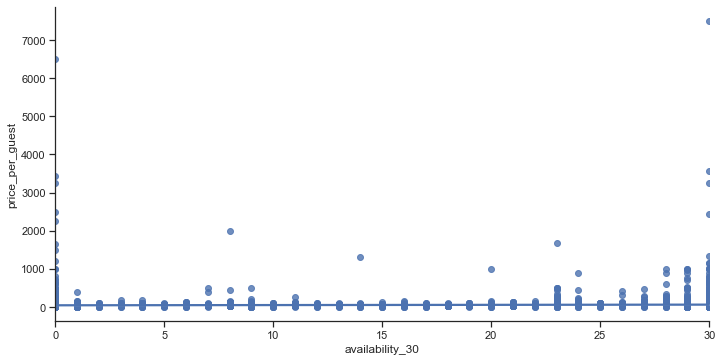

In [ ]:
## Plotting price and availability

sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="availability_30", y="price_per_guest", data=df, height=5, aspect=2)
plt.show()

Now we plot Revenue with availability to visualize any relationship. Revenue decreases as availability increases, however we notice that there are potential outliers, so we will test that out.

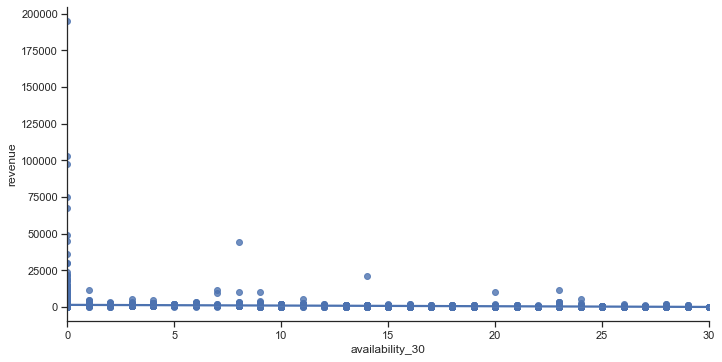

In [ ]:
# Show the results of a linear regression within our dataset

sns.lmplot(x="availability_30", y="revenue", data=df, height=5, aspect=2)
plt.show()

In [ ]:
## Removing outliers from revenue. All values that are +/- 3 standard deviation

df = df[np.abs(df.revenue-df.revenue.mean())<=(3*df.revenue.std())]

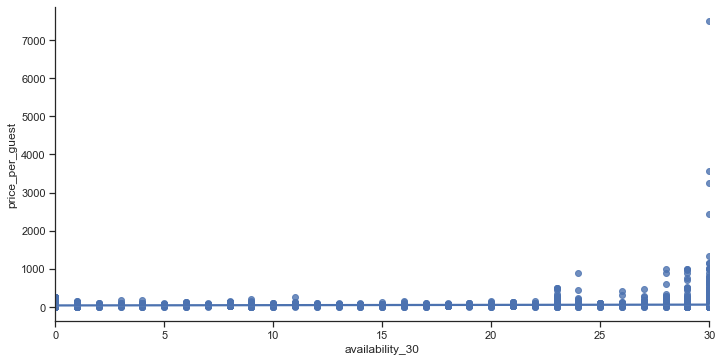

In [ ]:
# Relationship between price_per_guest and quantity after outlier removal

sns.lmplot(x="availability_30", y="price_per_guest", data=df,height=5, aspect=2)
plt.show()

Before outlier removal, we had some listings earning 200,000 with 0 avail, which means they charged 6,667 per night per guest which does not seem right at all. After removing outliers, we can see see a much clearer relationship between revenue and availability, also denotes by the downward facing line on the graph. Now we can definitely say that Revenue decreases as availability increases, which should be the case rationally as well.

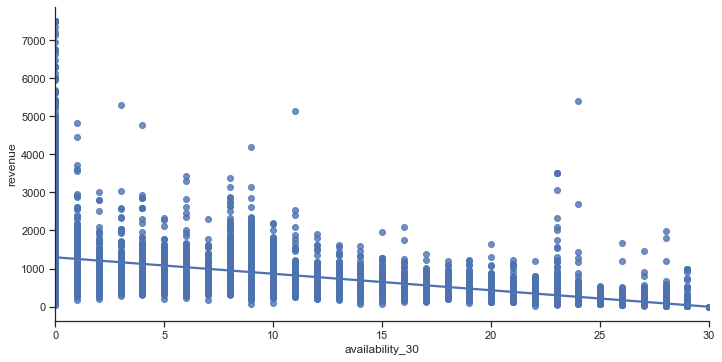

In [ ]:
# Relationship between revenue and quantity after outlier removal

sns.lmplot(x="availability_30", y="revenue", data=df, height=5, aspect=2)
plt.show()

## Data Processing and Feature Engineering

Here we will be cleaning up columns, dealing with NaN values, dropping irrelevant columns, encoding categorical variables and establishing a baseline by creating a simple naive classifier.

Since we have established above that price is not the only factor affecting availability, here we tried to find all unique amenities offered by guests from our dataset but there is inconsistency in data entry which make it hard to get only unique amenities. For instance: we have a 'kitchen' and another value ' kitchen'. They both are the same thing but the extra space in the 2nd kitchen makes it a different value for python. So we decided to use all amenities in our model to capture the whole picture and not remove repeated amenities as they are not repeated according to python. For example: just including the first 'kitchen' in our model, will lead to an error in our analysis because if our model finds ' kitchen' in a listing, it will label a false in the 'kitchen' column even though it was present in the listing's amenities

In [ ]:
# Identifying all unique amenities offered in our dataset 
result= df['amenities'].str.split(',', expand=True).stack().tolist()

unique = []
for i in result:
    a = i.replace('[', '')
    b = a.replace(']', '')
    c = b.replace('"', '')
    unique.append(c)

unique = list(set(unique))

In [ ]:
## Cleaning up the amenities column

## Removing non-letter characters from amenities
sc_sub = re.compile('\W+')
df['amenities'] = [sc_sub.sub(' ', amenity) for amenity in df['amenities']]


In [ ]:
## Transforming ech and every amenity into a binary feature

## Here we start with 2nd value in the unique column because the 1st value is blank in that list

amenities2 = unique[1:]
for amenity in amenities2:
    df[amenity] = df.amenities.str.contains(amenity)

Here is a snapshot of our dataset with all the amenities binarized. Now each amenity is present in its own column which can contain only a True/False value.

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_per_guest,revenue,BBQ grill,Free parking on premises,Smoke alarm,Free street parking,Barbecue utensils,Extra pillows and blankets,Hangers,Baby monitor,Suitable for events,Lock on bedroom door,Game console,Window guards,Hangers,TV,Lake access,Garden or backyard,Private entrance,Outlet covers,Breakfast,Pool toys,Private living room,Coffee maker,Room-darkening shades,Air conditioning,Children\u2019s books and toys,Lockbox,Pool,Pack \u2019n Play/travel crib,Children\u2019s dinnerware,Lake access,Shower gel,Washer,Building staff,Children\u2019s books and toys,Essentials,Paid parking off premises,Host greets you,Changing table,Kitchen,Hair dryer,Kitchen,Lock on bedroom door,Microwave,First aid kit,Pets allowed,Long term stays allowed,Free parking on premises,Shower gel,Bathtub,Breakfast,Dryer,Beach essentials,Pocket wifi,Garden or backyard,Shampoo,Long term stays allowed,Gym,Single level home,Patio or balcony,Paid parking on premises,Shampoo,Crib,Keypad,Lockbox,Stove,Coffee maker,Smart lock,Cooking basics,Dishes and silverware,Hair dryer,Beachfront,Elevator,High chair,Wifi,Bedroom comforts,Bread maker,Cable TV,Carbon monoxide alarm,Pool cover,Elevator,Window guards,Dishes and silverware,Hot water,Bed linens,Indoor fireplace,Barbecue utensils,Smart lock,Luggage dropoff allowed,High chair,Private hot tub,Table corner guards,Hot tub,Dryer,Indoor fireplace,Stove,Building staff,Washer,Laptop-friendly workspace,Babysitter recommendations,Shared hot tub,Hot tub,Babysitter recommendations,Ski-in/Ski-out,EV charger,TV,Fire extinguisher,Iron,Refrigerator,Fireplace guards,Baking sheet,Baby bath,Paid parking off premises,Full kitchen,Hot water,Wifi,Bathroom essentials,Essentials,Self check-in,Microwave,Waterfront,Carbon monoxide alarm,Ethernet connection,Air conditioning,Dishwasher,Stair gates,Extra pillows and blankets,Fire extinguisher,Smoke alarm,Private entrance,Oven,Cleaning before checkout,Piano,First aid kit,Paid parking on premises,Pool,Kitchenette,Host greets you,Dishwasher,Iron,Gym,Heating
0,1419,https://www.airbnb.com/rooms/1419,20200909043044,2020-09-09,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64617,-7

## Naive Classifier

We want to create a simple naive classifer as our baseline before we create other robust models. So we calculate the avg revenue from our dataset and classify all listings with a higher than avg revenue as 1 and vice versa.

In [ ]:
## Exploring target variable

print("Average Monthly Revenue:", df["revenue"].mean())
print("Median Monthly Revenue:", df["revenue"].median())

Average Monthly Revenue: 873.0904247628652
Median Monthly Revenue: 745.0


In [ ]:
## We will create a binary variable to turn this into a classification problem.
# Rooms that make more than the average monthly revenue will be labeled as 1 (better than avg),
# whereas rooms that earn less will be labeled as 0 (not better than avg)

avg_revenue = df["revenue"].mean()
df["better_than_avg"] = [1 if x >= avg_revenue else 0 for x in df["revenue"]]

#### Dealing with Missing Values

We have a lot of missing values in our dataset so we need to fix this. Below we have mentioned in the comments our intuition for filling missing values.

In [ ]:
## Replacing missing values with 0 for these columns because we manually checked rentals and the ones that had not received any reviews or ratings were recorded 
## as null in our dataset.

df['review_scores_rating'].fillna(0, inplace=True)
df['review_scores_accuracy'].fillna(0, inplace=True)
df['review_scores_cleanliness'].fillna(0, inplace=True)
df['review_scores_checkin'].fillna(0, inplace=True)
df['review_scores_communication'].fillna(0, inplace=True)
df['review_scores_location'].fillna(0, inplace=True)
df['review_scores_value'].fillna(0, inplace=True)

# we had NaN in host identity verified which is a boolean column. We again followed the same intuition for this and went in the listings to manually check and see 
# what was going on. All Nan values were filled with 0 as these hosts had not yet been verified/ were in the verification process when we last scraped the airbnb 
# website for listings. 

df['host_identity_verified'].fillna('f', inplace=True)

# Thirdly, listings with NaN reviews per month had no reviews left by host until last scraped and hence we get a NaN value for this column so again we decide to fill with 0. 

df['reviews_per_month'].fillna(0, inplace=True)
df['reviews_per_month'] = round(df['reviews_per_month'])

# Lastly, we had only 4 missing values for host total listing count and so we decided to manually fill it by doing a count of all 4 host ids with NaN values. 
# It turns out all 4 hosts have only 1 listing so we decided to fill 1 for these listings.
df['host_total_listings_count'].fillna(1, inplace=True)

### Dropping columns that wont be useful for our models

**Transformed columns**: "amenities", "price", "avaialability_30", "accommodates"

**Columns with a large number of imputable missing variables**: "host response time",  "host acceptance rate", etc

**Features that cannot be modeled**: "latitude", "longitude", "id", etc

**Features that do not make sense for our question**: "host_has_profile_pic","minimum_nights","maximum_nights", etc

In [ ]:
# Dropping features

df.drop(["amenities","id","listing_url", 'scrape_id', 'last_scraped', 'name', 'description', 'picture_url','host_id','calendar_updated','has_availability',
         "availability_30", 'host_url', 'host_name','availability_60','availability_90','host_since','host_location','host_about','host_response_time','availability_365',
         "host_response_rate", "host_acceptance_rate",'host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','calendar_last_scraped',
         'host_listings_count','neighbourhood','neighbourhood_group_cleansed','property_type','calculated_host_listings_count_private_rooms',
         'maximum_maximum_nights','number_of_reviews_ltm','first_review','last_review','license','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
         "host_has_profile_pic",'bathrooms','bedrooms','beds', 'latitude','longitude','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
         'calculated_host_listings_count_shared_rooms','bathrooms_text','minimum_nights','maximum_nights','minimum_nights_avg_ntm',
         'maximum_nights_avg_ntm', 'neighborhood_overview','number_of_reviews_l30d', 'price', 'accommodates', 'price_per_guest', 'number_of_reviews'], axis=1, inplace = True)

Here is a snapshot of our final dataset before encoding our categorical variable. We have 19288 rows after accounting for outliers

In [ ]:
df.describe()

,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,revenue,better_than_avg
count,19288.00000,19288.000000,19288.000000,19288.000000,19288.000000,19288.000000,19288.000000,19288.000000,19288.000000,19288.000000,19288.000000
mean,5.52836,73.251141,7.464745,7.294121,7.535514,7.544535,7.530278,7.320147,0.950436,873.090425,0.422698
std,15.41086,40.047074,4.094720,4.032831,4.119638,4.124443,4.105900,4.035579,1.582304,825.763368,0.494001
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,78.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,0.000000,260.000000,0.000000
50%,1.00000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.000000,745.000000,0.000000
75%,4.00000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1215.000000,1.000000
max,272.00000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,16.000000,7500.000000,1.000000


### Multicollinearity

Here we check for this to make sure we don't have variables that are highly correlated with each other to avoid issues of overfitting. None, except revenue, of the features seem to have a high correlation with our target varaible.

In [ ]:
## Check correlation among features for potential issues for multicollinearity

df[df.columns[1:]].corr()['better_than_avg']

review_scores_rating               0.009334
review_scores_accuracy             0.007303
review_scores_cleanliness          0.008043
review_scores_checkin              0.001043
review_scores_communication        0.004769
review_scores_location             0.005410
review_scores_value                0.008058
reviews_per_month                 -0.128609
revenue                            0.725645
 BBQ grill                         0.032976
 Free parking on premises         -0.058776
 Smoke alarm                       0.009242
 Free street parking              -0.083886
 Barbecue utensils                -0.002107
 Extra pillows and blankets       -0.068757
 Hangers                          -0.103543
 Baby monitor                      0.019060
 Suitable for events               0.011901
 Lock on bedroom door             -0.149729
 Game console                      0.004212
Window guards                     -0.020099
Hangers                           -0.103543
TV                              

We are creating our dependent and independent variable list to be input into our models. We decide to drop revenue from our variable list as it has high correlation with our target variable plus it has been used to create our target variable.

In [ ]:
## establishing features to be used as X and y
rev = df[['revenue', 'better_than_avg']]
X = df.drop(['better_than_avg', 'revenue'], axis=1)
y = df['better_than_avg']

### Encoding variables

We are getting dummies for all our categorical variables so that they can be interpreted correctly by our models

In [ ]:
## Data wrangling to prepare data for our model

X1 = pd.get_dummies(X)

This is the final dataset we will be using in our model. We have over 100 columns 

In [ ]:
X1.head()

,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,BBQ grill,Free parking on premises,Smoke alarm,Free street parking,Barbecue utensils,Extra pillows and blankets,Hangers,Baby monitor,Suitable for events,Lock on bedroom door,Game console,Window guards,Hangers,TV,Lake access,Garden or backyard,Private entrance,Outlet covers,Breakfast,Pool toys,Private living room,Coffee maker,Room-darkening shades,Air conditioning,Children\u2019s books and toys,Lockbox,Pool,Pack \u2019n Play/travel crib,Children\u2019s dinnerware,Lake access,Shower gel,Washer,Building staff,Children\u2019s books and toys,Essentials,Paid parking off premises,Host greets you,Changing table,Kitchen,Hair dryer,Kitchen,Lock on bedroom door,Microwave,First aid kit,Pets allowed,Long term stays allowed,Free parking on premises,Shower gel,Bathtub,Breakfast,Dryer,Beach essentials,Pocket wifi,Garden or backyard,Shampoo,Long term stays allowed,Gym,Single level home,Patio or balcony,Paid parking on premises,Shampoo,Crib,Keypad,Lockbox,Stove,Coffee maker,Smart lock,Cooking basics,Dishes and silverware,Hair dryer,Beachfront,Elevator,High chair,Wifi,Bedroom comforts,Bread maker,Cable TV,Carbon monoxide alarm,Pool cover,Elevator,Window guards,Dishes and silverware,Hot water,Bed linens,Indoor fireplace,Barbecue utensils,Smart lock,Luggage dropoff allowed,High chair,Private hot tub,Table corner guards,Hot tub,Dryer,Indoor fireplace,Stove,Building staff,Washer,Laptop-friendly workspace,Babysitter recommendations,Shared hot tub,Hot tub,Babysitter recommendations,Ski-in/Ski-out,EV charger,TV,Fire extinguisher,Iron,Refrigerator,Fireplace guards,Baking sheet,Baby bath,Paid parking off premises,Full kitchen,Hot water,Wifi,Bathroom essentials,Essentials,Self check-in,Microwave,Waterfront,Carbon monoxide alarm,Ethernet connection,Air conditioning,Dishwasher,Stair gates,Extra pillows and blankets,Fire extinguisher,Smoke alarm,Private entrance,Oven,Cleaning before checkout,Piano,First aid kit,Paid parking on premises,Pool,Kitchenette,Host greets you,Dishwasher,Iron,Gym,Heating,host_identity_verified_f,host_identity_verified_t,neighbourhood_cleansed_Agincourt North,neighbourhood_cleansed_Agincourt South-Malvern West,neighbourhood_cleansed_Alderwood,neighbourhood_cleansed_Annex,neighbourhood_cleansed_Banbury-Don Mills,neighbourhood_cleansed_Bathurst Manor,neighbourhood_cleansed_Bay Street Corridor,neighbourhood_cleansed_Bayview Village,neighbourhood_cleansed_Bayview Woods-Steeles,neighbourhood_cleansed_Bedford Park-Nortown,neighbourhood_cleansed_Beechborough-Greenbrook,neighbourhood_cleansed_Bendale,neighbourhood_cleansed_Birchcliffe-Cliffside,neighbourhood_cleansed_Black Creek,neighbourhood_cleansed_Blake-Jones,neighbourhood_cleansed_Briar Hill-Belgravia,neighbourhood_cleansed_Bridle Path-Sunnybrook-York Mills,neighbourhood_cleansed_Broadview North,neighbourhood_cleansed_Brookhaven-Amesbury,neighbourhood_cleansed_Cabbagetown-South St.James Town,neighbourhood_cleansed_Caledonia-Fairbank,neighbourhood_cleansed_Casa Loma,neighbourhood_cleansed_Centennial Scarborough,neighbourhood_cleansed_Church-Yonge Corridor,neighbourhood_cleansed_Clairlea-Birchmount,neighbourhood_cleansed_Clanton Park,neighbourhood_cleansed_Cliffcrest,neighbourhood_cleansed_Corso Italia-Davenport,neighbourhood_cleansed_Danforth,neighbourhood_cleansed_Danforth East York,neighbourhood_cleansed_Don Valley Village,neighbourhood_cleansed_Dorset Park,neighbourhood_cleansed_Dovercourt-Wallace Emerson-Junction,neighbourhood_cleansed_Downsview-Roding-CFB,neighbourhood_cleansed_Dufferin Grove,neighbourhood_cleansed_East End-Danforth,neighbourhood_cleansed_Edenbridge-Humber Valley,neighbourhood_cleansed_Eglinton East,neighbourhood_cleansed_Elms-Old Rexdale,neighbourhood_cleansed_Englemount-Lawrence,neighbourhood_cleansed_Eringate-Centennial-West Deane,neighbourhood_cleansed_Etobic

## Model Creation

### Logistic regression

We get a testing set accuracy of 64.1%. This was a 7.1% increase from our baseline model.

In [ ]:
# Create Training and Test Dataset with 80% Training and 20% Test
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state= 0)

# Run Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Analyze results
print("Results:")
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
log_TP = confusion[1, 1]
log_TN = confusion[0, 0]
log_FP = confusion[0, 1]
log_FN = confusion[1, 0]

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",log_TN / float(log_TN + log_FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",log_FP / float(log_TN + log_FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:",metrics.precision_score(y_test, y_pred))

#Sensitivity? TPR:
print("Recall:",metrics.recall_score(y_test, y_pred))

print("-----------------------------------------------------------------------")
# examine the class distribution of the testing set (using a Pandas Series method)
print("Class Distribution:", y_test.value_counts())
# calculate the percentage of ones
print("Percentage of Ones:", y_test.mean())

# calculate the percentage of zeros
print("Percentage of Zeros:", 1 - y_test.mean())

# calculate null accuracy (for binary classification problems coded as 0/1)
print("Null Accuracy:",max(y_test.mean(), 1 - y_test.mean()))

print('------------')
print("Improvement in accuracy compared to Naive Model", metrics.accuracy_score(y_test,y_pred) - max(y_test.mean(), 1 - y_test.mean()))

Results:
Accuracy 0.6412649040953862
Specificity: 0.7679708826205641
False Positive Rate: 0.23202911737943585
Precision: 0.6064814814814815
Recall: 0.4734939759036145
-----------------------------------------------------------------------
Class Distribution: 0    2198
1    1660
Name: better_than_avg, dtype: int64
Percentage of Ones: 0.43027475375842406
Percentage of Zeros: 0.5697252462415759
Null Accuracy: 0.5697252462415759
------------
Improvement in accuracy compared to Naive Model 0.07153965785381022


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can see the confusion matrix output form this model below.

<AxesSubplot:>

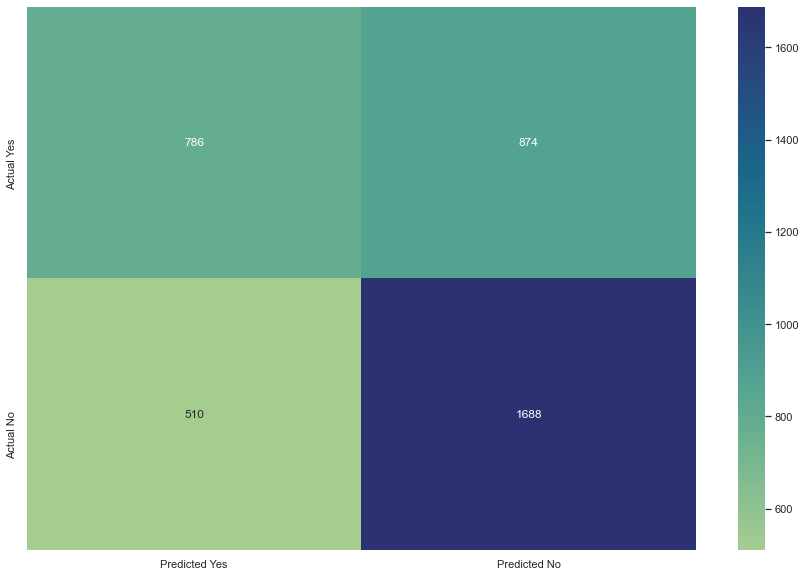

In [ ]:
## Creating confusion matrix

sns.set(rc={'figure.figsize':(15,10)})
log_data=[[log_TP, log_FN], [log_FP, log_TN]]
heatmap_log = pd.DataFrame(log_data)
heatmap_log.columns = ['Predicted Yes', 'Predicted No']
heatmap_log.index = ['Actual Yes', 'Actual No']
sns.heatmap(heatmap_log, annot=True, cmap="crest", fmt='d')

We have 786 listings predicted as better than avg correctly, 874 listings which earned higher than avg but our model predicted the opposite. 510 listings were predicted better than avg when they actually earned less tha avg and lastly 1688 listings were predicted not better than avg which matched our actual values.

### Decision tree Classifier

We get a testing set accuracy of 63.5% and a training set accuracy of 68.1%. This was a 6.5% increase from our baseline model for test set. 

In [ ]:

tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)
y_pred2 = tree.predict(X_test)
print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))


# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred2)
tree_TP = confusion[1, 1]
tree_TN = confusion[0, 0]
tree_FP = confusion[0, 1]
tree_FN = confusion[1, 0]

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",tree_TN / float(tree_TN + tree_FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",tree_FP / float(tree_TN + tree_FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:",metrics.precision_score(y_test, y_pred2))

#Sensitivity/ TPR:
print("Recall:",metrics.recall_score(y_test, y_pred2))

print("--------------------------------------------------------------")
# examine the class distribution of the testing set (using a Pandas Series method)
print("Class Distribution:", y_test.value_counts())
# calculate the percentage of ones
print("Percentage of Ones:", y_test.mean())

# calculate the percentage of zeros
print("Percentage of Zeros:", 1 - y_test.mean())

# calculate null accuracy (for binary classification problems coded as 0/1)
print("Null Accuracy:",max(y_test.mean(), 1 - y_test.mean()))

print("--------------")
print("Improvement in accuracy compared to Naive Model on test set", metrics.accuracy_score(y_test,y_pred2) - max(y_test.mean(), 1 - y_test.mean()))

Accuracy on the training subset: 0.681
Accuracy on the test subset: 0.635
Specificity: 0.7834394904458599
False Positive Rate: 0.21656050955414013
Precision: 0.6043225270157938
Recall: 0.43795180722891563
--------------------------------------------------------------
Class Distribution: 0    2198
1    1660
Name: better_than_avg, dtype: int64
Percentage of Ones: 0.43027475375842406
Percentage of Zeros: 0.5697252462415759
Null Accuracy: 0.5697252462415759
--------------
Improvement in accuracy compared to Naive Model on test set 0.0650596163815449


We can see the confusion matrix output form this model.

<AxesSubplot:>

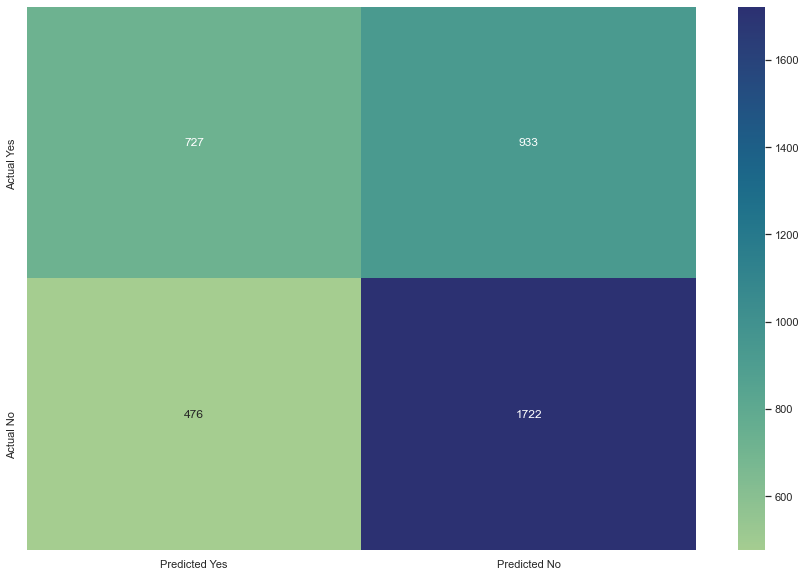

In [ ]:
## Creating confusion matrix

sns.set(rc={'figure.figsize':(15,10)})
tree_data=[[tree_TP, tree_FN], [tree_FP, tree_TN]]
heatmap_tree = pd.DataFrame(tree_data)
heatmap_tree.columns = ['Predicted Yes', 'Predicted No']
heatmap_tree.index = ['Actual Yes', 'Actual No']
sns.heatmap(heatmap_tree, annot=True, cmap="crest", fmt='d')

We have 727 listings predicted as better than avg correctly, 933 listings which earned higher than avg but our model predicted the opposite. 476 listings were predicted better than avg when they actually earned less than avg and lastly 1722 listings were predicted not better than avg which matched our actual values.

## Comparing model performance

Here is a bar graph that compares the testing set accuracy for our models. It is clear that naive classifier was the worst performing model and, hence our baseline. LR performed slightly better than our DT model with an additional ~1% increase. This was not enough to conclude which model is best in our case and so we had to do some more analysis. 

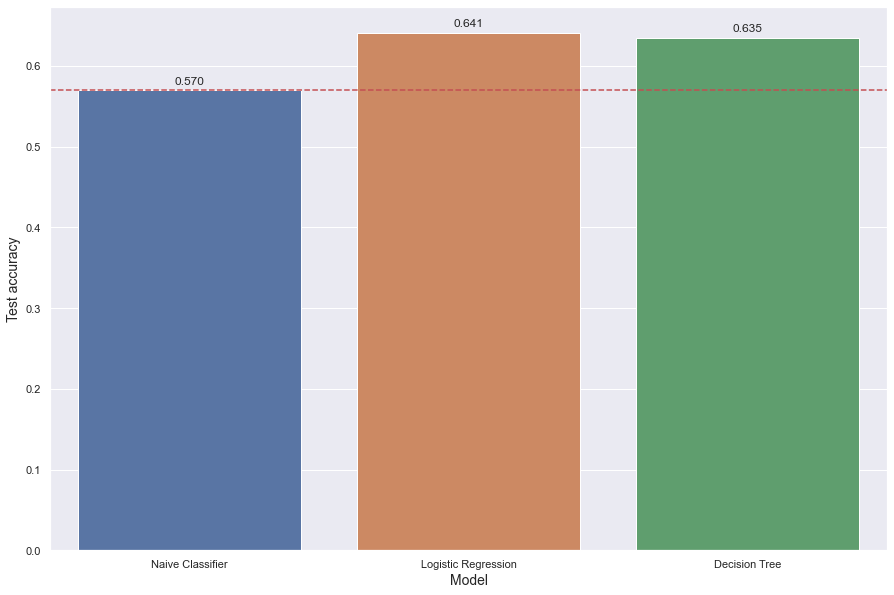

In [ ]:
clf = ['Naive Classifier', 'Logistic Regression', 'Decision Tree']
acc = [0.5697252462415759, 0.6412649040953862, 0.635]

bar_df = pd.DataFrame({"Model":clf, "Test accuracy":acc})

plt.figure(figsize=(15, 10))
splot=sns.barplot(x="Model",y="Test accuracy",data=bar_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Model", size=14)
plt.ylabel("Test accuracy", size=14)
splot.axhline(0.570, color='r', linestyle = '--')

We plotted this AUC-ROC curve for LR and DT. The Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. In simple terms the further the ROC line from the diagonal, the better it is at predicting classes. Here, we can see that both models are quite similar in terms of accuracy with Logistic Regression performing better however, we would like to conduct one more test before reaching a conclusion.

In [ ]:
# plotting ROC curve

lr_score = logreg.predict_proba(X_test)[:,1]
tree_score = tree.predict_proba(X_test)[:,1]

## Creating False and True Positive Rates

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, lr_score)
auc_lr = roc_auc_score(y_test, lr_score)
auc_lr = round(auc_lr,2)

false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, tree_score)
auc_dt = roc_auc_score(y_test, tree_score)
auc_dt = round(auc_dt,2)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, tree_score))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, lr_score))

roc_auc_score for DecisionTree:  0.6671061863468433
roc_auc_score for Logistic Regression:  0.6853945810539702


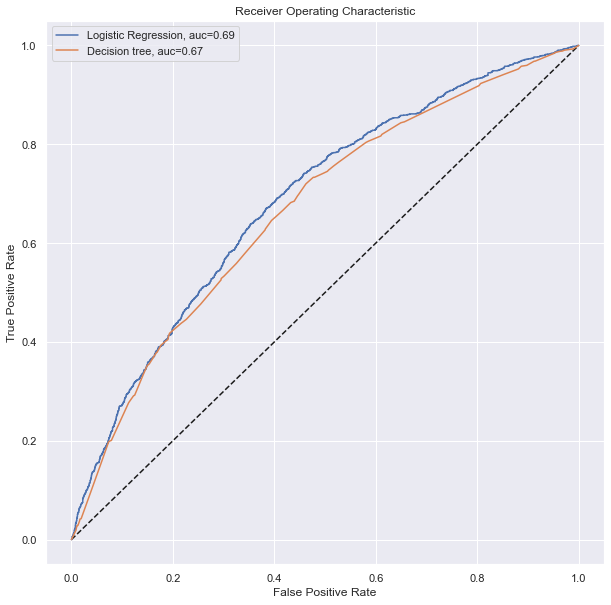

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot([0,1],[0,1], 'k--')
plt.plot(false_positive_rate1, true_positive_rate1, label="Logistic Regression, auc="+str(auc_lr))
plt.plot(false_positive_rate2, true_positive_rate2, label= "Decision tree, auc="+str(auc_dt))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.show()

# Results

To best understand what model serves best, we decided to interpret the results with domain of our research question in context and identify which metric has the biggest payoff. In terms of accuracy, we should be choosing LR model however the gap is negligible. 

**Specificity or True negative rate** signifies our model predicts the host's revenue will not be better than average, and they aren't. This is good as our model can recommend strategies to them on how they can improve. We want this to be as high as possible so Clearly, decision tree takes the lead on this one with a difference of  1.5%. 

**False Positives** signifies our model predicts the host’s revenue will be better than average, but they aren't. Our model doesn't do anything to help the hosts, and they don't make money. This does not help or hurt Airbnb however, the lower this is, the more accurate predictions our models make. Decision tree again takes the lead with a lower % and performs 1.5% better than logistic regression.

**Precision** signifies the ratio of correct positive predictions to the total predicted positives. Here logistic regression leads with a slight margin of 0.2% as we want this to be as high as possible.

**Recall/Sensitivity** signifies the true positive rate implying the ability of a model to find all the relevant cases within a dataset. Here logistic regression performs better by 3.5%. 

1- sensitivity gives us the **false negative rate**. This signifies that the model predicts host’s revenue generation will not be better than average, but they would have been (Our model recommends changes to host, but it was not necessary. Host's waste money because of our model's predictions). Here, logistic regression performs better with a 3.5% margin.


#### The Most Important Metric 

For our case, the most important metric is **specificity** and **false positive rate**. False negatives ( we reach out to the host but we didn’t have to) is more acceptable than false positives (us not reaching out to host and host failing) because, with false positives, the host doesn't make money, AirBnb doesn't make money, and no one is happy. Based on accuracy, AUC, and important metrics, we can conclude that Logistic Regression performs better for our case. Except for specificity, logistic regression outperforms decision trees in every other aspect.


## Most Important features 

According to our decision tree classifier, below is a list of the most imprtant features that affect a listing's potential to earn higher than avg revenue.

In [ ]:
feat = zip(X1,tree.feature_importances_)
Important_Features = pd.DataFrame(list(feat), columns = ['features','FeatureImportances'])
Important_Features.sort_values(by=['FeatureImportances'],ascending = False).head(50)

,features,FeatureImportances
0,host_total_listings_count,0.215830
8,reviews_per_month,0.116310
80,Elevator,0.097694
292,room_type_Entire home/apt,0.095628
1,review_scores_rating,0.049172
122,Hot water,0.028674
272,neighbourhood_cleansed_University,0.024235
56,Shower gel,0.022034
274,neighbourhood_cleansed_Waterfront Communities-...,0.018039
5,review_scores_communication,0.016502


Text(0.5, 1.0, 'Top 20 features and their importance as per decision tree')

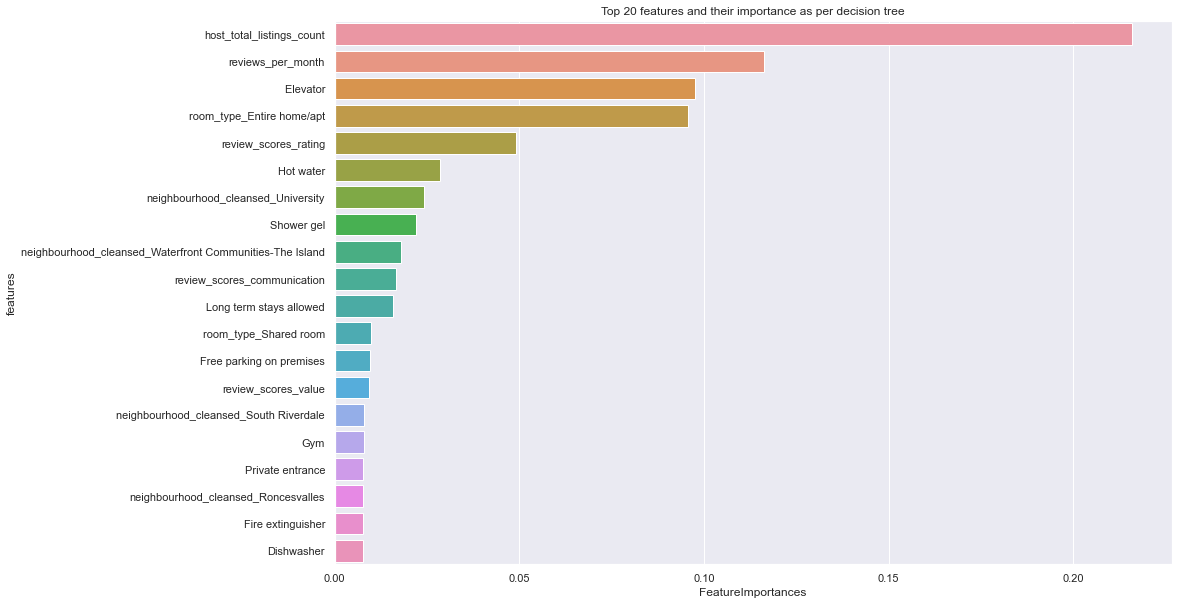

In [ ]:
sns.barplot(x= 'FeatureImportances', y= 'features', 
            data=Important_Features.sort_values(by=['FeatureImportances'],ascending = False).head(20), 
            orient = 'h').set_title('Top 20 features and their importance as per decision tree')

## Analysing some of the most important feature from the output above

In [ ]:
vis_df = X1.join(rev)

In [ ]:
# Analysing the most important room type: entire room 
Avg_rev_hm = vis_df.groupby('room_type_Entire home/apt')['revenue'].mean()
Suc_hm = vis_df.groupby('room_type_Entire home/apt')['better_than_avg'].mean()

print(Avg_rev_hm)
print(Suc_hm)

room_type_Entire home/apt
0    718.388642
1    962.969624
Name: revenue, dtype: float64
room_type_Entire home/apt
0    0.325762
1    0.479016
Name: better_than_avg, dtype: float64


Listings renting out entire home were successful 48 % of the time with an average monthly revenue of 963 dollars per guest, while those who were not renting out entire home were successful only 32.5% of the time with an average monthly revenue of 718 dollars.

In [ ]:
# Analysing the most important amenity as per our model

Avg_rev_lock = vis_df.groupby('Lock on bedroom door')['revenue'].mean()
Suc_lock = vis_df.groupby('Lock on bedroom door')['better_than_avg'].mean()

print(Avg_rev_lock)
print(Suc_lock)

Lock on bedroom door
False    932.376158
True     643.685618
Name: revenue, dtype: float64
Lock on bedroom door
False    0.460299
True     0.277203
Name: better_than_avg, dtype: float64


Rooms that had a lock on the bedroom door were successful only 28 % of the time with an average monthly revenue of 644 dollars, while those who did not have a lock on the bedroom door were successful 46% of the timw with an average monthly revenue of 932 dollars.

This seemed surprising at first, but after thinking about it, our best guess is that these were private rooms. A host on AirBnb can rent entire home or private room. If a host is renting out entire home, then they don't need the bedroom door to lock, whereas if they were next door, guests would want their room to lock. These numbers would then make sense because if you are renting your entire home, you are bound to make more money all else equal. This is further validated by the  output before which states that entire homes listings are more successful at earning higher revenue compared to listings without entire homes.

In [ ]:
Avg_rev = vis_df.groupby('reviews_per_month')['revenue'].mean()
Suc = vis_df.groupby('reviews_per_month')['better_than_avg'].mean()

print(Avg_rev)
print(Suc)

reviews_per_month
0.0     958.798101
1.0     809.106853
2.0     749.077033
3.0     727.287225
4.0     662.213752
5.0     693.637676
6.0     683.053293
7.0     623.485409
8.0     666.293631
9.0     414.551054
10.0    472.833750
11.0    569.455049
12.0    363.646032
13.0    540.000000
14.0    176.875000
16.0    279.000000
Name: revenue, dtype: float64
reviews_per_month
0.0     0.476295
1.0     0.388275
2.0     0.345123
3.0     0.329659
4.0     0.289037
5.0     0.295652
6.0     0.287879
7.0     0.218182
8.0     0.250000
9.0     0.057143
10.0    0.208333
11.0    0.176471
12.0    0.111111
13.0    0.000000
14.0    0.000000
16.0    0.000000
Name: better_than_avg, dtype: float64


Listings that had higher reviews were successful lesser than those with lower number of reviews. This seems surprising as well since more reviews would result in higher occupancy rate since we can learn from other people's experiences. To expand on this further, we would need to conduct sentiment analysis on a coulmn with all the review comments to see how many were positive and how many were negative to better understand how this number of reviews column affects our hosts.

##  <ins>References</ins>
- [Harrington, Peter (2012). Machine learning in action. Manning Publications Co.](https://www.manning.com/books/machine-learning-in-action)
- [AirBnB website (2021) "About us"](https://news.airbnb.com/about-us/)
- [GuestReady Website (2018) "5 Ways to increase your Airbnb occupancy rate", GuestReady](https://www.guestready.com/blog/increase-airbnb-occupancy/)
- [Antonio Ivanovski (2017), "Maximize Value of AirBnb Rental"](https://www.kaggle.com/ivanovskia1/maximize-value-of-airbnb-rental)
- [Hosty Website (2020) "How To Increase Your Airbnb Revenue?", Hosty](https://www.hostyapp.com/how-to-increase-airbnb-revenue/)
- [PwC website, "What's driving customer loyalty for today's hotel brands?"](https://www.pwc.com/id/en/pwc-publications/industries-publications/telecommunications-media-technology/customer-intelligence-series--what-s-driving-customer-loyalty-fo.html)
- [AirBnb website (2021), "Showcase your space"](https://www.airbnb.ca/d/pro-photography?locale=en&_set_bev_on_new_domain=1623727060_NmI3MGE0N2VmN2Jl)
- [Heba Baker (2019), "What Is Airbnb Occupancy Rate?"](https://medium.com/mashvisor/what-is-airbnb-occupancy-rate-mashvisor-f73a7c9f1c8b#:~:text=Now%20because%20rental%20income%20is,very%20important%20for%20Airbnb%20investors.)
